<a href="https://colab.research.google.com/github/VictorOmondi1997/exploring-whr/blob/master/exploring_whr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the World Happiness Report

<center> Data Cleaning, Data Aggregation and Data Visualization</center>

World Happiness Report is an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

# Questions

The following are the list of questions we need to find out in the dataset.

* How can aggregating the data give us more insight into happiness scores?
* How did world happiness change from 2015 to 2017?
* Which factors contribute the most to the happiness score?

# Data Aggregation

## Dataset

You can download the dataset [here](https://www.kaggle.com/unsdsn/world-happiness)

The data set is a CSV file called [`World_Happiness_2015.csv`](https://www.kaggle.com/unsdsn/world-happiness). Below are descriptions for columns:

|**Column**|**Description**|
|---|---|
|**`Country`**|Name of the country.|
|**`Region`**|Name of the region the country belongs to.|
|**`Happiness Rank`**|The rank of the country, as determined by its happiness score.|
|**`Happiness Score`**|A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.|
|**`Family`**|The estimated extent to which family contributes to the happiness score.|
|**`Freedom`**|The estimated extent to which freedom contributes to the happiness score.|
|**`Generosity`**|The estimated extent to which generosity contributes to the happiness score.|

# Dataset Inspection

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [32]:
happiness2015 = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/343/World_Happiness_2015.csv?versionId=jQYOlRzzMPFpIhNjLxwFNWDSOAsdpjnN')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [33]:
happiness2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [34]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Mean Happiness Score by region

In [35]:
happiness2015.groupby('Region')['Happiness Score'].mean().sort_values()

Region
Sub-Saharan Africa                 4.202800
Southern Asia                      4.580857
Southeastern Asia                  5.317444
Central and Eastern Europe         5.332931
Middle East and Northern Africa    5.406900
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Western Europe                     6.689619
North America                      7.273000
Australia and New Zealand          7.285000
Name: Happiness Score, dtype: float64

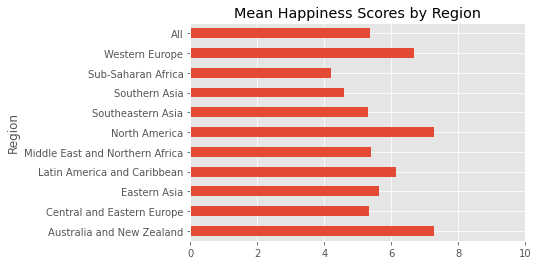

In [36]:
happiness2015.pivot_table(values='Happiness Score', index='Region', margins=True).plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

# Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

In [37]:
happiness2016 = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/344/World_Happiness_2016.csv?versionId=g2kGflhRQVfDoiUtXaBqfKoLx_BrgtJs')
happiness2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [38]:
happiness2017 = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/344/World_Happiness_2017.csv?versionId=VojSXR_mvHTzv41jGPwSvMFGZiHuKXCq')
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [0]:
for i,df in enumerate([happiness2015,happiness2016,happiness2017]):
    df['Year']=2015+i

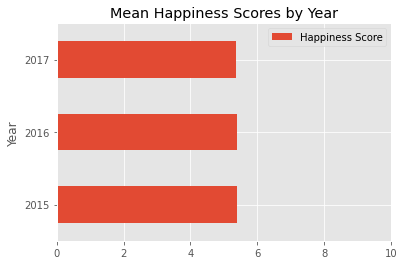

In [40]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
combined = pd.concat([happiness2015, happiness2016, happiness2017])
combined.pivot_table(index='Year', values='Happiness Score').plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))
plt.show()

mean world happiness score stayed approximately the same from 2015 to 2017.

# Exploring the factors that contribute happiness.

> the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

The factors incluce:

* Economy (GDP per Capita)
* Family
* Health (Life Expectancy)
* Freedom
* Trust (Government Corruption)
* Generosity

# Which of the factors above contribute the most to the happiness score?

In [41]:
happiness2015=happiness2015.rename({'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }, axis=1)
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [42]:
factors_impact=happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']].applymap(lambda x: 'High' if x > 1 else 'low')
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,low,low,low,low
1,High,High,low,low,low,low
2,High,High,low,low,low,low
3,High,High,low,low,low,low
4,High,High,low,low,low,low
...,...,...,...,...,...,...
153,low,low,low,low,low,low
154,low,low,low,low,low,low
155,low,low,low,low,low,low
156,low,low,low,low,low,low


> We can see from the results that, according to our definition, the `Economy` and `Family` columns had a high impact on the happiness scores of the first five countries.

In [43]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
low,92,69,156,158.0,158.0,158.0


> Now, we can easily see that the `Family` and `Economy` columns contain the most `'High'` values!

In [44]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt=pd.melt(happiness2015, id_vars=main_cols,value_vars=factors)
melt['Percentage']=round((melt.value/melt['Happiness Score'])*100,2)
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


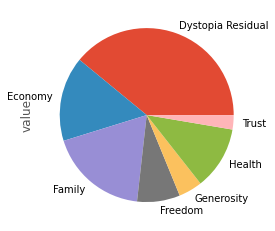

In [45]:
pv_melt=melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)
plt.show()

# World Development Indicators

working with the additional economic data from the World Bank.

## Column description

Below are descriptions for the columns:

|**Column Name**|**Column Description**|
|---|---|
|`ShortName`|Name of the country|
|`Region`|The region the country belongs to|
|`IncomeGroup`|The income group the country belongs to, based on Gross National Income (GNI) per capita|
|`CurrencyUnit`|Name of country's currency|
|`SourceOfMostRecentIncomeAndExpenditureData`|The name of the survey used to collect the income and expenditure data|
|`SpecialNotes`|Contains any miscellaneous notes about the data|

In [46]:
world_dev = pd.read_csv("https://dsserver-prod-resources-1.s3.amazonaws.com/346/World_dev.csv?versionId=1G.IH6N10dXmFAG1mSTdtdLax4d9DPtC")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,1980,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1968 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,2011 (household consumption only).,NaN,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [47]:
merged=pd.merge(left=happiness2015, right=world_dev,how='left', left_on='Country', right_on='ShortName')
merged=merged.rename(col_renaming, axis=1)
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [48]:
merged['Currency'] = merged.CurrencyUnit.str.split().str.get(-1)
merged.Currency.head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency, dtype: object

# National Accounts

In [49]:
merged_national_accounts = merged[merged.SpecialNotes.str.contains(r"[Nn]ational accounts", na=False)]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015,SWE,Sweden,Sweden,Kingdom of Sweden,SE,Swedish krona,Fiscal year end: June 30; reporting period for...,Europe & Central Asia,High income: OECD,SE,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015,NZL,New Zealand,New Zealand,New Zealand,NZ,New Zealand dollar,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,High income: OECD,NZ,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,NaN,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,AUS,Australia,Australia,Commonwealth of Australia,AU,Australian dollar,Fiscal year end: June 30; reporting period for...,East Asia & Pacific,High income: OECD,AU,Original chained constant price data are resca...,2013/14,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011,2015,USA,United States,United States,United States of America,US,U.S. dollar,Fiscal year end: September 30; reporting perio...,North America,High income: OECD,US,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar


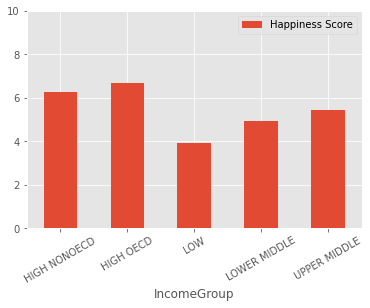

In [50]:
merged["IncomeGroup"]=merged.IncomeGroup.str.upper().str.strip().str.replace(" INCOME","").str.strip().str.replace(":","")
pv_incomes=merged.pivot_table(index="IncomeGroup", values="Happiness Score")
pv_incomes.plot(kind='bar', rot=30,ylim=(0,10))

In [51]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [52]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [53]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [54]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
combined.isnull().sum()

COUNTRY                          0
REGION                         155
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
STANDARD ERROR                 312
ECONOMY                        312
FAMILY                           0
HEALTH                         312
FREEDOM                          0
TRUST                          312
GENEROSITY                       0
DYSTOPIA RESIDUAL                0
YEAR                             0
LOWER CONFIDENCE INTERVAL      313
UPPER CONFIDENCE INTERVAL      313
ECONOMY GDP PER CAPITA         158
HEALTH LIFE EXPECTANCY         158
TRUST GOVERNMENT CORRUPTION    158
WHISKER HIGH                   315
WHISKER LOW                    315
dtype: int64

In [55]:
happiness2015 = pd.read_csv("https://dsserver-prod-resources-1.s3.amazonaws.com/347/wh_2015.csv?versionId=jfEXotZkNMvPapsuIuIiUy9PD8d.yQpp")
happiness2016 = pd.read_csv("https://dsserver-prod-resources-1.s3.amazonaws.com/347/wh_2016.csv?versionId=YTFx.axVvCayn262yITV7dTcN5VWrd_8")
happiness2017 = pd.read_csv("https://dsserver-prod-resources-1.s3.amazonaws.com/347/wh_2017.csv?versionId=rpTqH_8SLrRgSWwCJvfx472qYfpLK5Qm")
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
combined.isnull().sum()

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

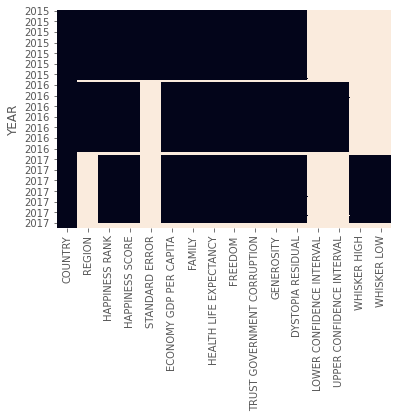

In [56]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

**We can make the following observations:**

* No values are missing in the COUNTRY column.
* There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.
* Some columns only have data populated for one year.
* It looks like the REGION data is missing for the year 2017.

Since the regions are fixed values - the region a country was assigned to in 2015 or 2016 won't change - we should be able to assign the 2015 or 2016 region to the 2017 row.

In [0]:
combined = pd.merge(left=combined, right=pd.read_csv("https://raw.githubusercontent.com/VictorOmondi1997/exploring-whr/master/data/regions.csv"), on="COUNTRY", how="left")
combined = combined.drop("REGION_x", axis=1)

In [58]:
combined.isna().sum()

COUNTRY                          0
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
REGION_y                         0
dtype: int64

# check for duplicate values

Since we should only have one country for each year, we can be a little more thorough by defining rows with ONLY the same country and year as duplicates.

In [60]:
combined[combined.duplicated(["COUNTRY", 'YEAR'])]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y


Since the dataframe is empty, we can tell that there are no rows with exactly the same country AND year.

In [61]:
combined["COUNTRY"]=combined["COUNTRY"].str.upper()
combined[combined.duplicated(['COUNTRY', 'YEAR'])]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [0]:
combined = combined.drop_duplicates(["COUNTRY", "YEAR"])

# Missing values

Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we'll drop them:

* STANDARD ERROR
* LOWER CONFIDENCE INTERVAL
* UPPER CONFIDENCE INTERVAL
* WHISKER HIGH
* WHISKER LOW

In [63]:
combined=combined.drop(['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW'], axis=1)
combined.isna().sum()

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION_y                        0
dtype: int64

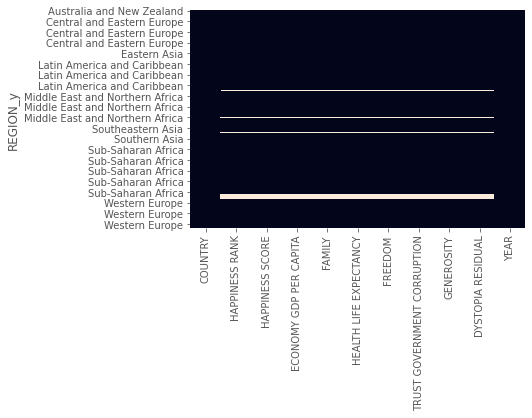

In [65]:
sorted_happiness = combined.set_index('REGION_y').sort_values(['REGION_y', 'HAPPINESS SCORE'])
sns.heatmap(sorted_happiness.isnull(), cbar=False)

From the visualization above, we can also identify that only three regions contain missing values:

* Sub-Saharan Africa
* Middle East and Northern Africa
* Latin America and Carribbean

The Sub-Saharan Africa region contains the most missing values, accounting for about 9 percent of that regions's values. 

>* Only about 4 percent of the values in each column are missing.
* Dropping rows with missing values won't cause us to lose information in other columns.

In [67]:
combined.pivot_table(index='REGION_y', values='HAPPINESS SCORE', margins=True)

,HAPPINESS SCORE
REGION_y,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


We can see that the world mean happiness score, 5.370728, is over 1 point higher than the mean happiness score for the Sub-Saharan Africa region, 4.150957.

Also, if we think about the reasons why a country may not have participated in the happiness survey - war, natural disaster, etc - many of them would likely result in a lower happiness score than even the region's mean. We'll conclude that the mean for the whole world wouldn't be a good estimate for them.

As a result, we'll decide that of these two options, it's better to drop the rows with missing values.

In [68]:
combined = combined.dropna()
combined.isna().sum()

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION_y                       0
dtype: int64